# Prep work

In [2]:
import pandas as pd
import inspect #to inspect dataset with custom function
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #correlation matrix and logarithmic


import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.__version__

'2.3.1'

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('/home/bri/carprice/dataset/CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Dictionary

car_ID: Unique ID # for each car

Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)

CarName: Make and model of car

Fueltype: Car Fuel Type (gas or diesel)

Aspiration: Car Aspiration (standard or turbo)

Doornumber: Number of car doors (two or four)

Carbody: Type of car body (convertible, sedan, hatchback, wagon, or hardtop)

Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)

Enginelocation: Location of car engine (front of rear)

Wheelbase: Car wheel base in inches

Carlength: Car length in inches

Carwidth: Car width in inches

Carheight: Car height in inches

Curbweight: Car weight in pounds

Enginetype: Car engine type (dohc, dohcv, I, ohc, ohcf, ohcv, or rotor)

Cylindernumber: Number of car cylinders (two, three, four, five, six, eight, or twelve)

Enginesize: Size of engine (numerical values of cubic inches)

Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)

Boreratio: Car Bore-Stroke Ratio is the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length

Stroke: Car strokes (numerical value in strokes)

Compressionratio: Car compression ratio (ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume))

Horsepower: Car horsepower (numerical values of horsepower)

Peakrpm: Car peak RPM (revolutions per minute)

Citympg: Car city MPG (miles per gallon)

Highwaympg: Car highway MPG (miles per gallon)

Price: total price of car in dollars

In [6]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
188,189,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995.0
25,26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
174,175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.35,22.5,73,4500,30,33,10698.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
45,46,0,isuzu D-Max V-Cross,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5


# Custom function to check data

In [7]:
def data_check(*datasets):
    """
    Function to display missing values, percentage of missing values,
    duplicated data, total rows, unique values, and dtype of each column for multiple datasets.

    :param datasets: One or more pandas dataframes to check.
    :return: A summary dataframe with the details for all datasets.
    """

    # Get the variable names from the caller's scope
    caller_locals = inspect.currentframe().f_back.f_locals
    dataset_names = [name for name, val in caller_locals.items() if id(val) in [id(ds) for ds in datasets]]

    summary_list = []  # To store details for each dataset

    for i, data in enumerate(datasets):
        # Get the name of the dataset variable
        dataset_name = dataset_names[i] if i < len(dataset_names) else f'Dataset_{i+1}'

        # For each dataset, compute the necessary details
        null_counts = data.isnull().sum()
        null_percentage = (null_counts / len(data)) * 100
        dup_count = data.duplicated().sum()
        dtypes = data.dtypes
        total_rows = len(data)
        unique_values = data.nunique()  # Calculate unique values per column

        # Create a temporary DataFrame to store the results for this dataset
        temp_df = pd.DataFrame({
            'Dataset': dataset_name,
            'Column': data.columns,
            'Data Type': dtypes.values,
            'Missing Values': null_counts.values,
            'Percentage Missing': null_percentage.values,
            'Total Rows': [total_rows] * len(data.columns),
            'Duplicate Rows': [dup_count] * len(data.columns),
            'Unique Values': unique_values.values  # Add unique values per column
        })

        # Append the result to the summary list
        summary_list.append(temp_df)

    # Concatenate all summaries into one DataFrame
    final_summary = pd.concat(summary_list, ignore_index=True)

    return final_summary

## Check for Misval, Dups, Unique

In [8]:
data_check(df)

,Dataset,Column,Data Type,Missing Values,Percentage Missing,Total Rows,Duplicate Rows,Unique Values
0,df,car_ID,int64,0,0.0,205,0,205
1,df,symboling,int64,0,0.0,205,0,6
2,df,CarName,object,0,0.0,205,0,147
3,df,fueltype,object,0,0.0,205,0,2
4,df,aspiration,object,0,0.0,205,0,2
5,df,doornumber,object,0,0.0,205,0,2
6,df,carbody,object,0,0.0,205,0,5
7,df,drivewheel,object,0,0.0,205,0,3
8,df,enginelocation,object,0,0.0,205,0,2
9,df,wheelbase,float64,0,0.0,205,0,53


# Custom function to check categorical columns

In [9]:
def categorical_summary(df):
    """
    Automatically detects categorical/'object' columns in a DataFrame
    and prints unique values for each categorical column.

    :param df: Input pandas DataFrame
    """
    # Detect categorical columns (object dtype and category dtype)
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not categorical_columns:
        print("No categorical columns found in the DataFrame.")
        return

    print(f"Found {len(categorical_columns)} categorical columns:\n")
    for col in categorical_columns:
        unique_vals = df[col].unique()
        print(f"'{col}' has {len(unique_vals)} unique categories: {unique_vals}\n")

In [10]:
categorical_summary(df)

Found 10 categorical columns:

'CarName' has 147 unique categories: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick cen

## dropping car_ID and carName because these two are not relevant for Regression Analysis

In [11]:
df =df.drop(['car_ID', 'CarName'], axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Distribution num feats

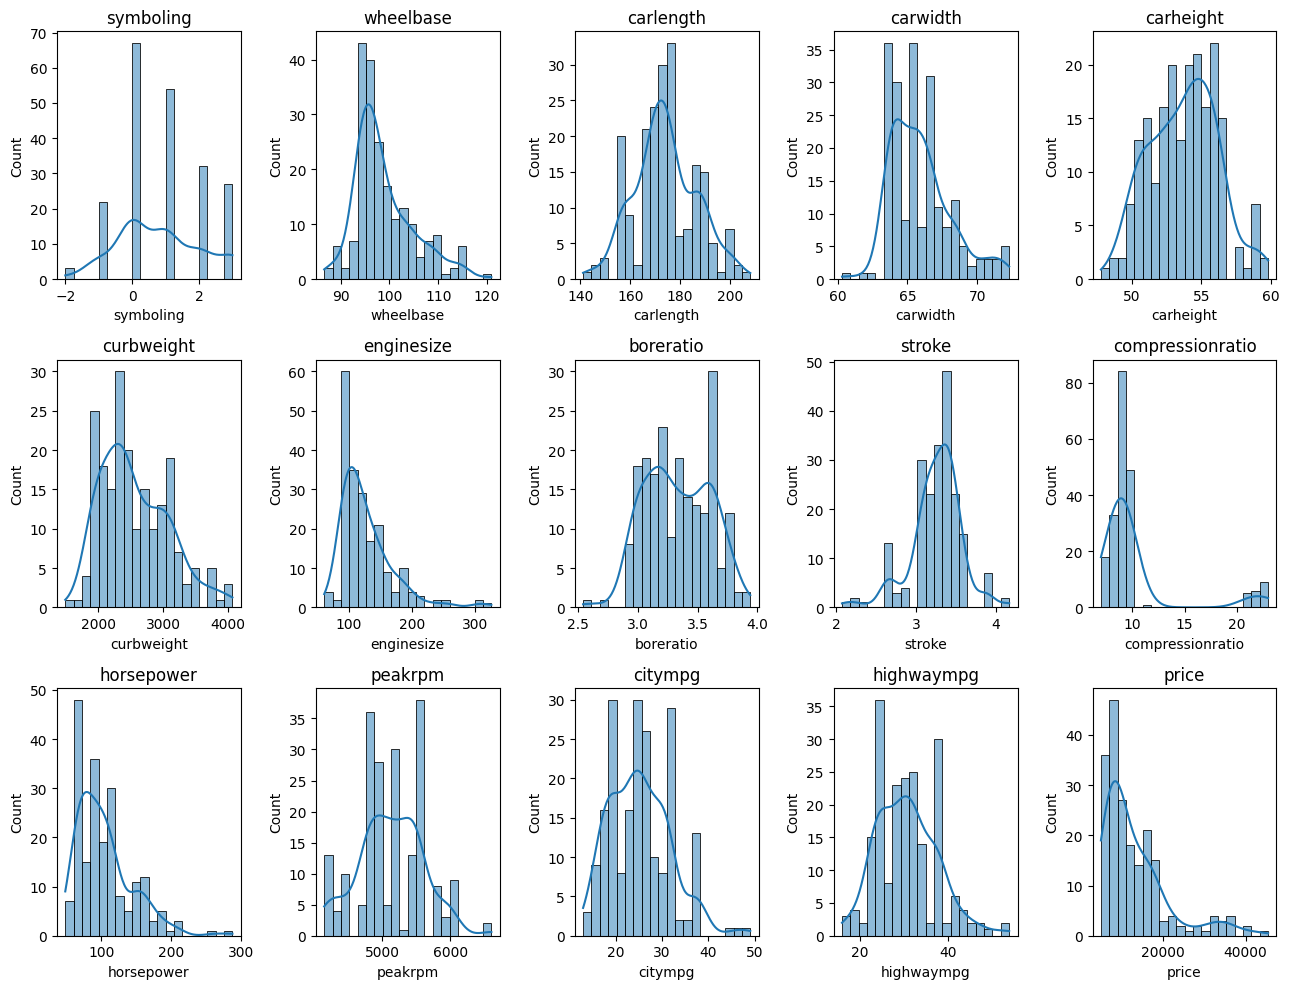

In [12]:
# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(13, 10))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## skew_col

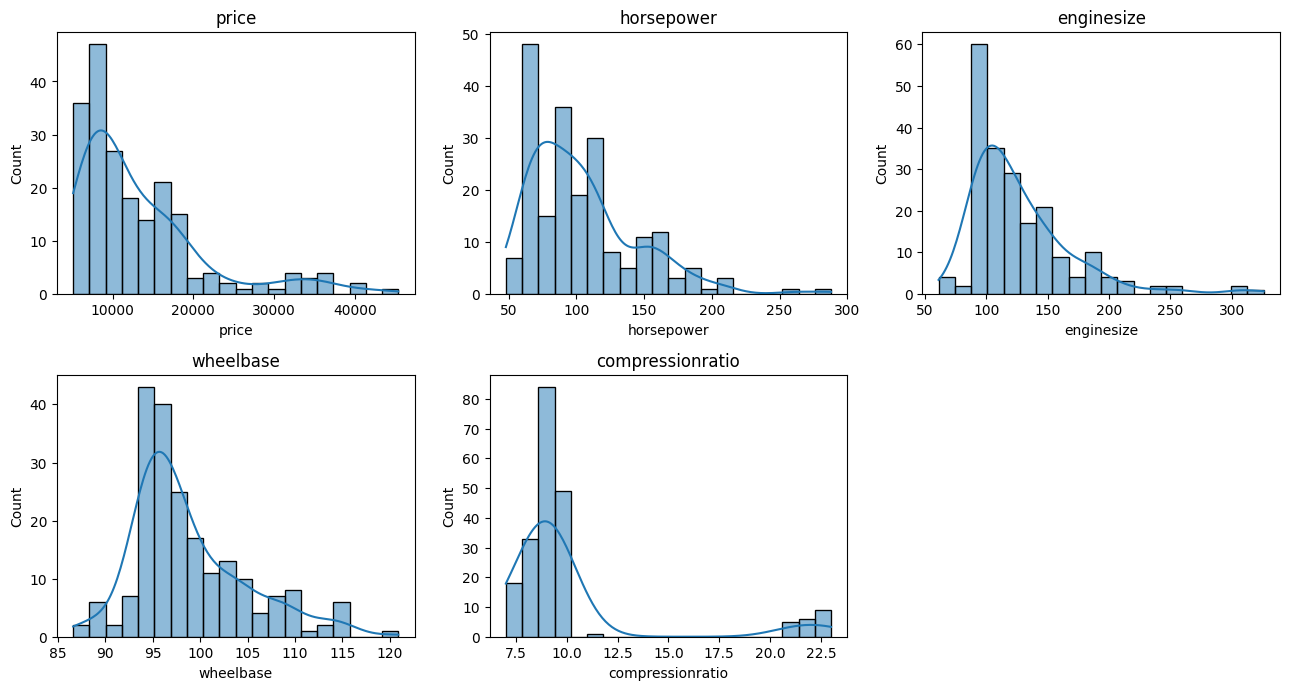

In [13]:
skew_col =['price','horsepower','enginesize', 'wheelbase','compressionratio']

plt.figure(figsize=(13, 10))
for feature in skew_col:
    plt.subplot(3, 3, skew_col.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

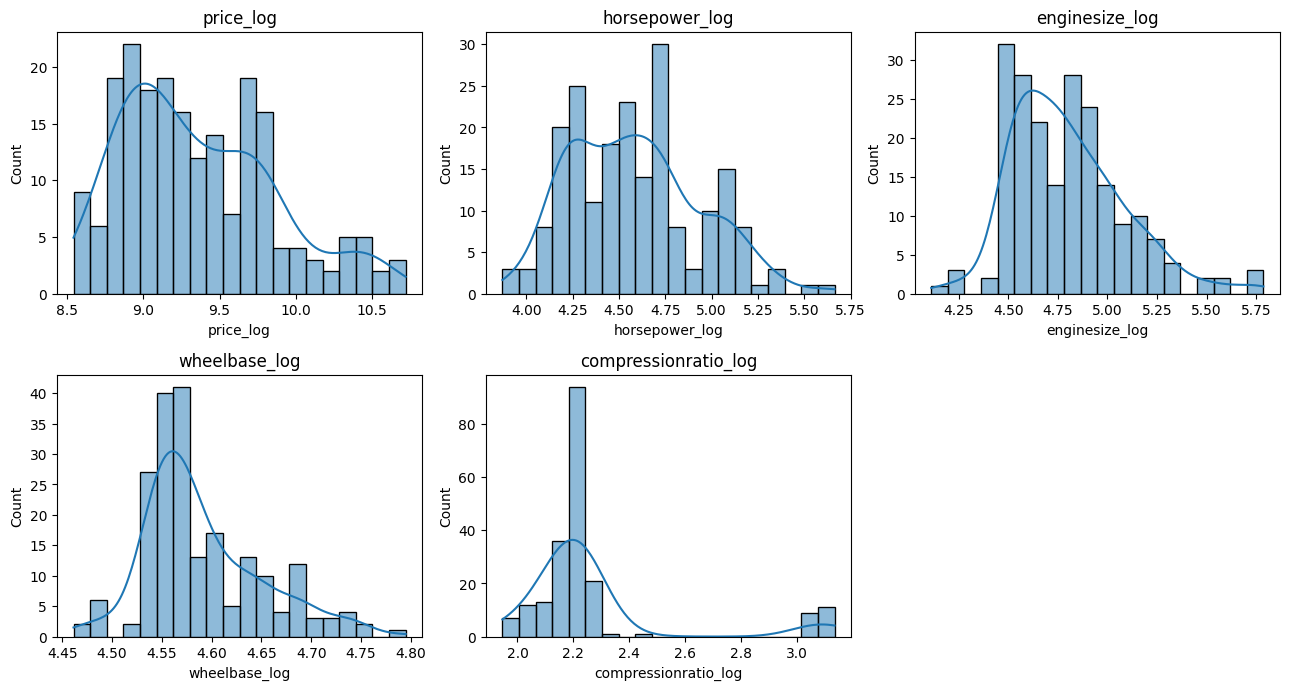

In [14]:
df_log=pd.DataFrame()
df_log[['price_log','horsepower_log','enginesize_log', 'wheelbase_log','compressionratio_log']] = df[['price','horsepower','enginesize', 'wheelbase','compressionratio']].apply(np.log)

log_col = ['price_log','horsepower_log','enginesize_log', 'wheelbase_log','compressionratio_log']
plt.figure(figsize=(13, 10))
for feature in log_col:
    plt.subplot(3, 3, log_col.index(feature) + 1)
    sns.histplot(data=df_log[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## Kolmogorov-Smirnov Test

In [15]:
# Import the Kolmogorov-Smirnov Test from scipy.stats
from scipy.stats import kstest


# Standardizing the transformations before performing KS test
ks_test_results = {}
for transformation in log_col:
    standardized_data = (df_log[transformation] - df_log[transformation].mean()) / df_log[transformation].std()
    ks_stat, ks_p_value = kstest(standardized_data, 'norm')
    ks_test_results[transformation] = (ks_stat, ks_p_value)

# Convert results to DataFrame for easier comparison
ks_test_results_df = pd.DataFrame.from_dict(ks_test_results, orient='index', columns=['KS Statistic', 'P-Value'])
print(ks_test_results_df.round(5))

                      KS Statistic  P-Value
price_log                  0.10094  0.02854
horsepower_log             0.10245  0.02512
enginesize_log             0.12874  0.00202
wheelbase_log              0.16277  0.00003
compressionratio_log       0.38600  0.00000


### Null and Alternate Hypothesis:

1. Null Hypothesis (): The data follows the specified distribution (normal distribution, in this case).

2. Alternate Hypothesis (): The data does not follow the specified distribution.

#### Result

The data do not follow the normal distribution even after being log-transformed

## Insights Num Feats dist

In [16]:
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Price Distribution

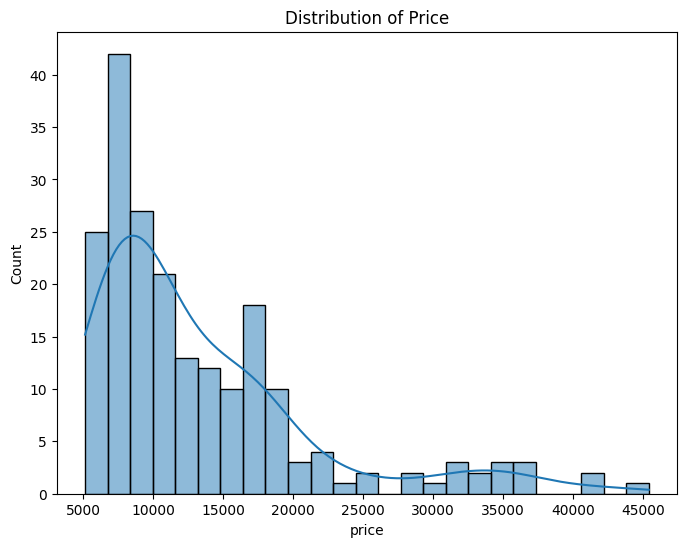

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=25, kde=True)
plt.title('Distribution of Price')
plt.show()

## insights Price Dist

highly skewed distribution, might need to apply log transformation which leads to log log level regression (?)

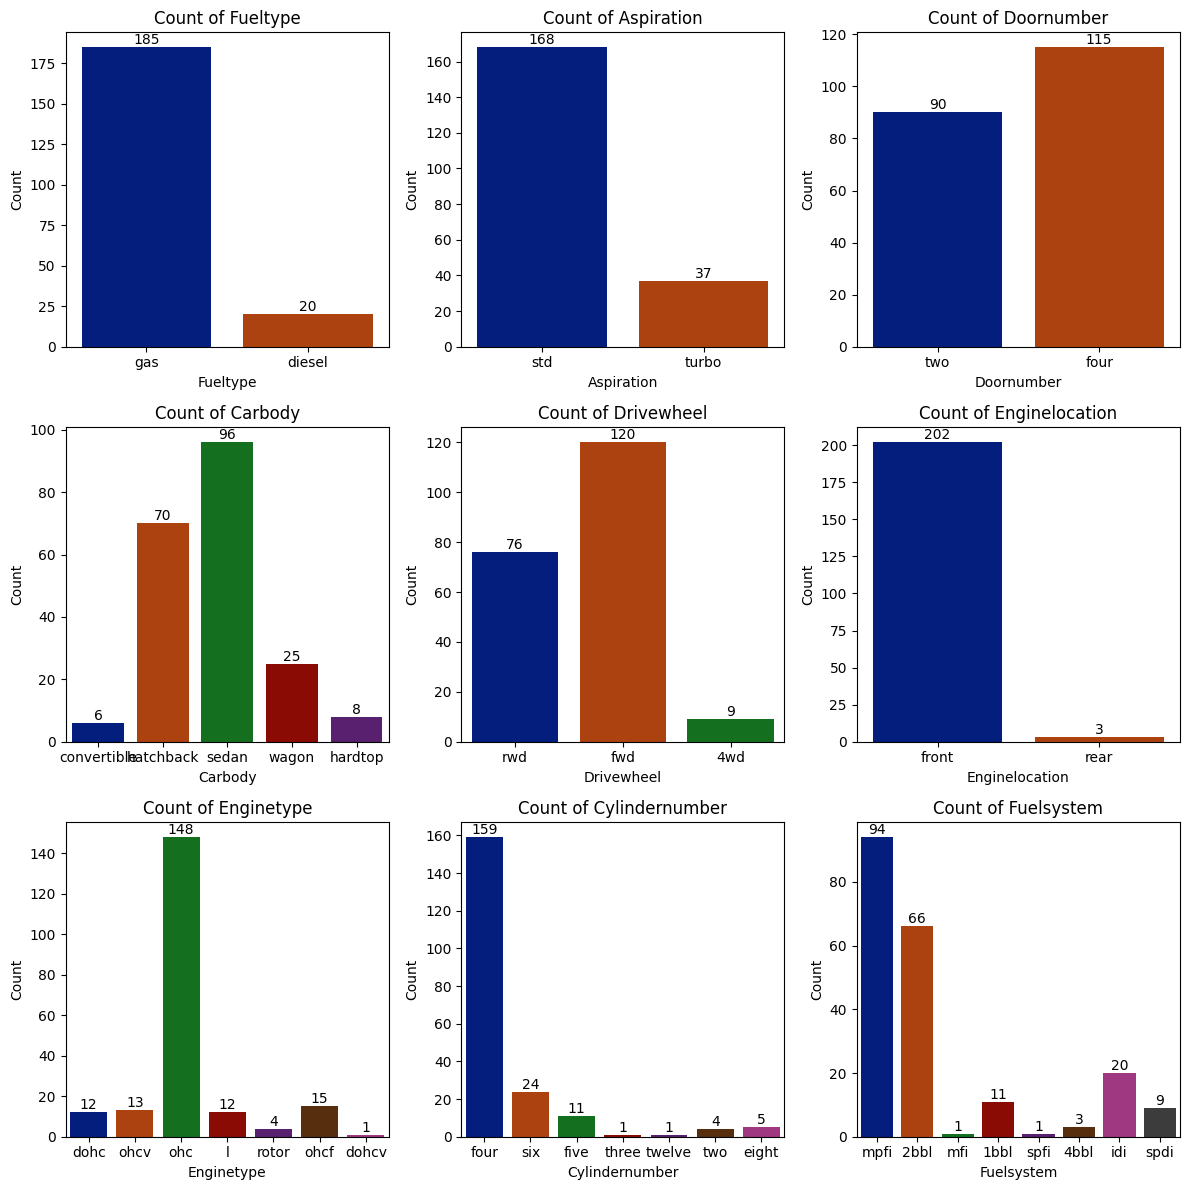

In [18]:
# Define the list of categorical columns to analyze
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='dark', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

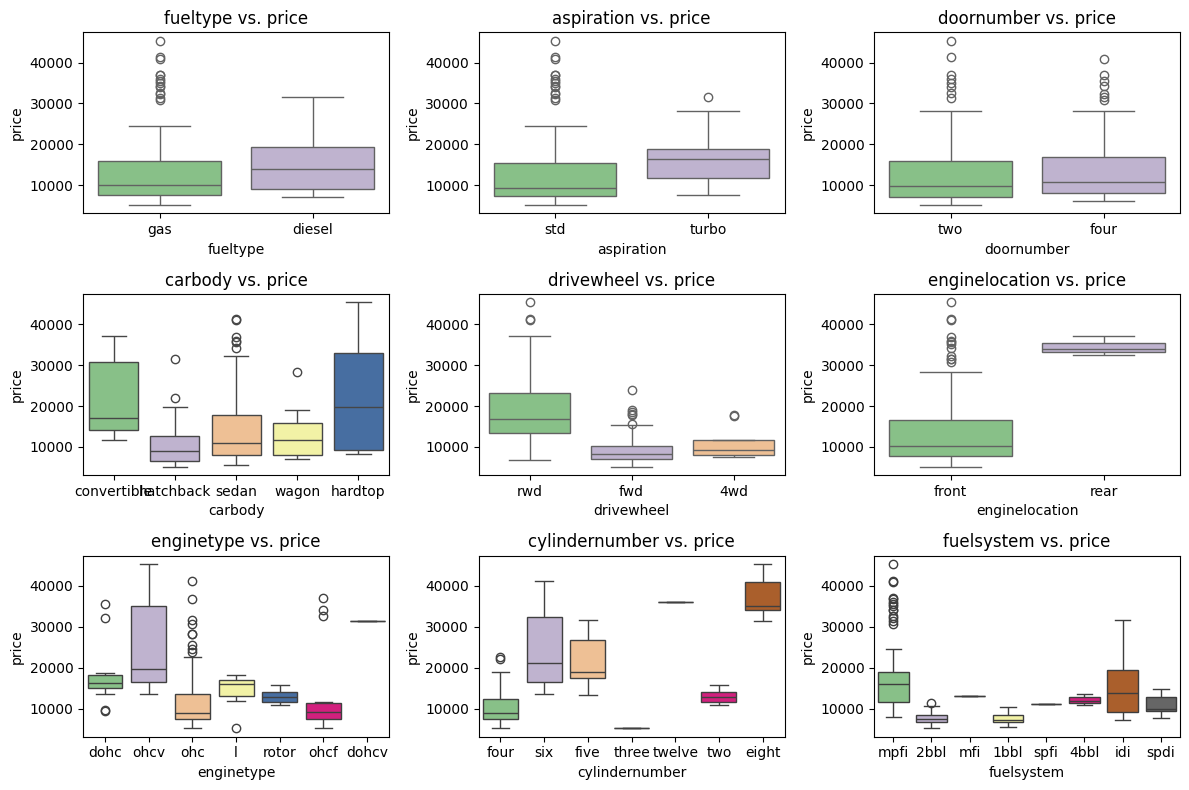

In [19]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)

    # Get unique categories and generate a color palette
    n_categories = df[feature].nunique()
    palette = sns.color_palette("Accent", n_categories)

    # Create boxplot with dynamic colors
    sns.boxplot(data=df, x=feature, y='price', palette=palette)
    plt.title(f'{feature} vs. price')

plt.tight_layout()
plt.show()

# Correlation Matrix Numerical

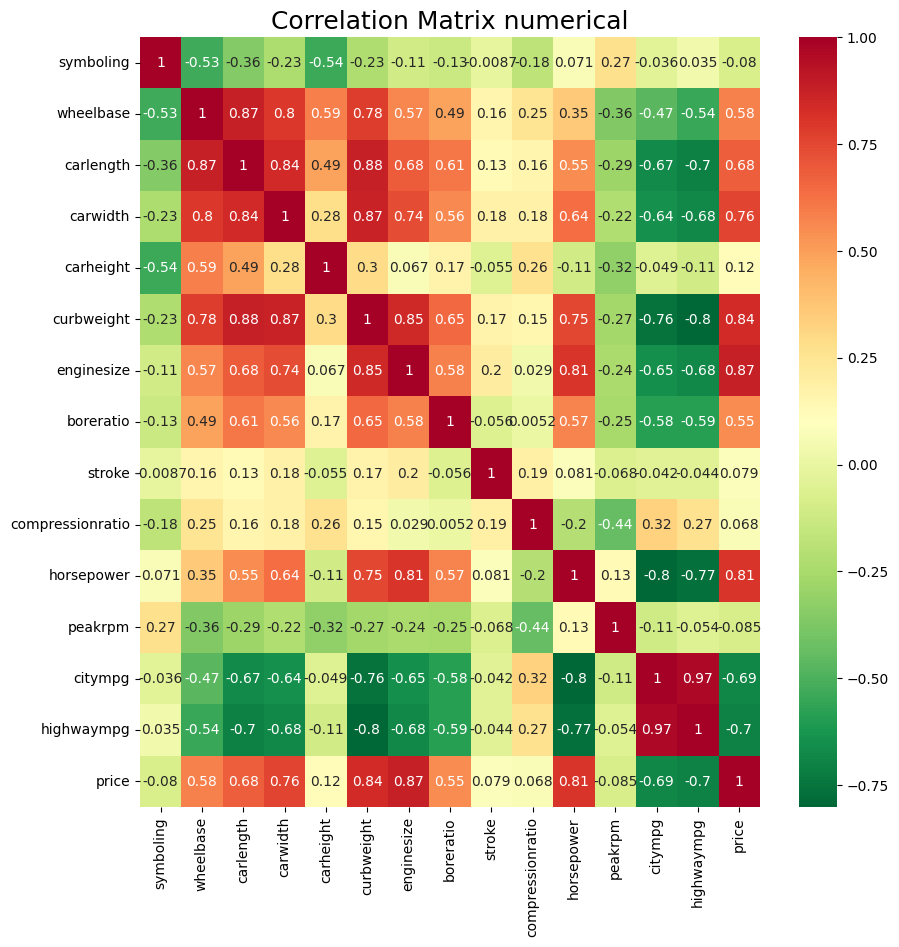

In [20]:
df_corr = df[numerical_features]
corr = df_corr.corr(method='pearson')

plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap='RdYlGn_r', annot=True)


plt.title("Correlation Matrix numerical", fontsize = 18)
plt.show()

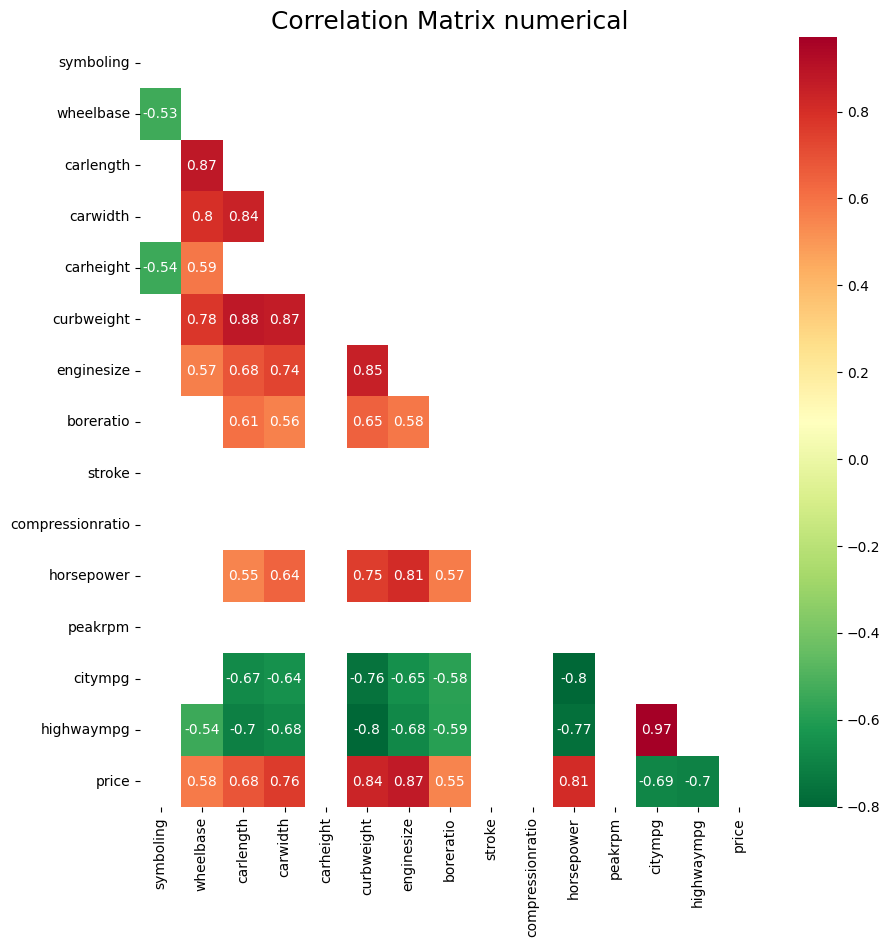

In [21]:
df_corr = df[numerical_features]
corr = df_corr.corr(method='pearson')

plt.subplots(figsize=(10, 10))

# create mask to display only the bottom triangle and filter out corr coef below 0.5
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdYlGn_r', mask=trimask | (np.abs(corr) <= 0.5), annot=True)


plt.title("Correlation Matrix numerical", fontsize = 18)
plt.show()

In [22]:
numerical_features

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [23]:
num_feats = [col for col in numerical_features if col != 'price']

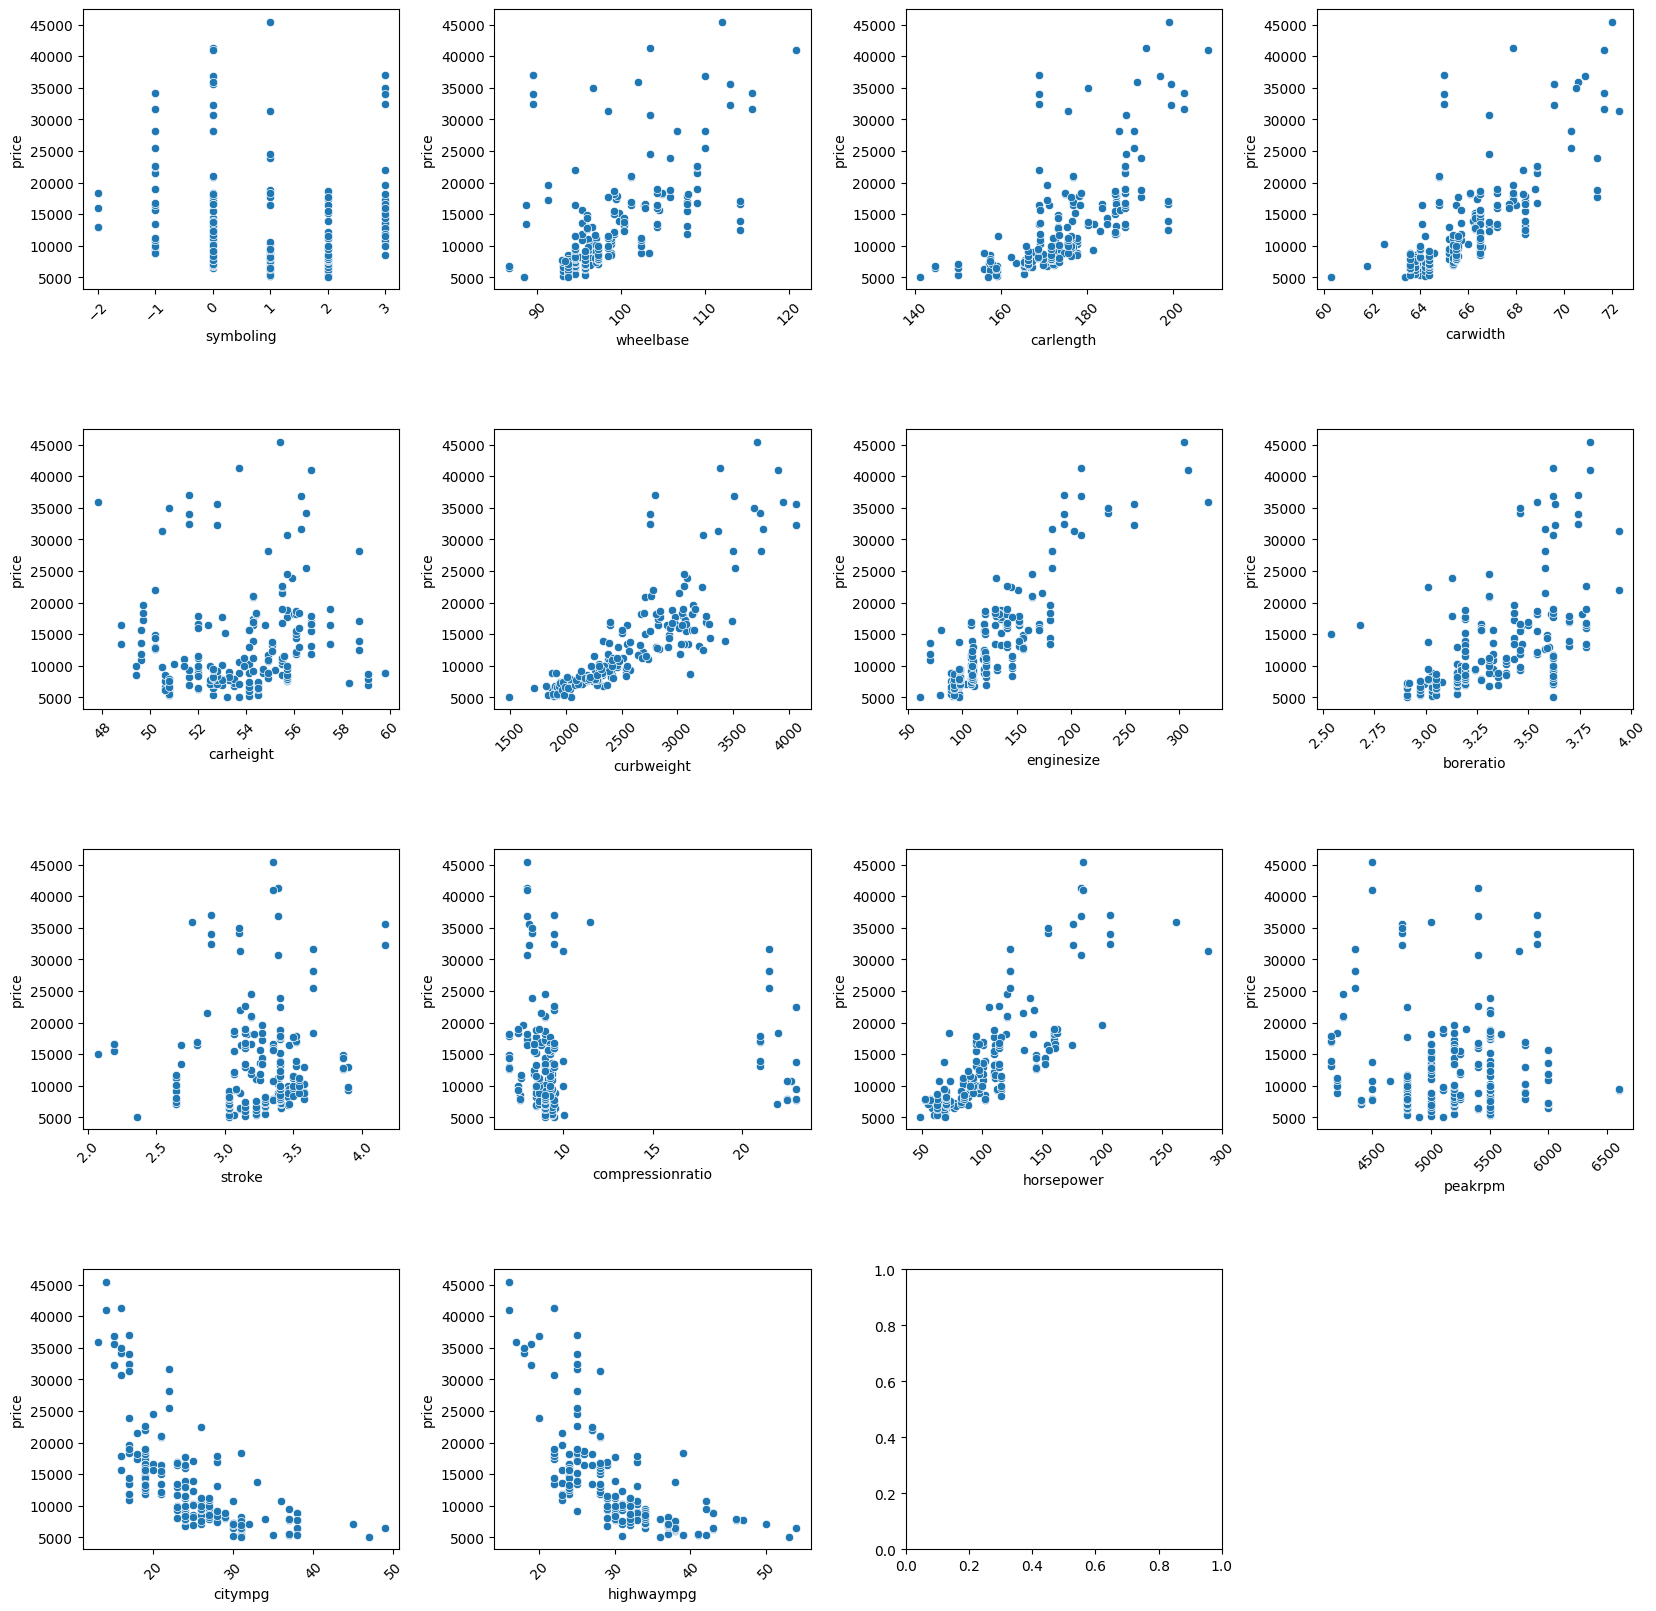

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flat = axes.flatten()  # Flatten to 1D for easy indexing

for x, col in enumerate(num_feats):
    ax = axes_flat[x]  # Use flat index
    sns.scatterplot(x=col, y='price', data=df, ax=ax)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide the unused last subplot (index 15)
axes_flat[15].set_axis_off()

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical AND horizontal spacing
plt.show()

#### symboling column must be treated as str or object as it is in fact not a num feat

In [25]:
df['symboling'] = df['symboling'].astype(object)

#### rerun numercl_features and num_feats for the correct order

In [26]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_feats = [col for col in numerical_features if col != 'price']

# Model Building

## Baseline Model Regression

Using only numerical features without any transformation

### using sklearn

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[num_feats]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

num_feats = 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',

In [28]:
# Inisialisasi Model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [29]:
results = pd.DataFrame()
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}


In [30]:
# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" MAE: {metrics['MAE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

Linear Regression:
 RMSE: 3559.69
 MAE: 2754.85
 R^2: 0.840

Ridge Regresion:
 RMSE: 3566.52
 MAE: 2753.72
 R^2: 0.839

Lasso Regression:
 RMSE: 3559.81
 MAE: 2754.90
 R^2: 0.840

ElasticNet Regression:
 RMSE: 3602.66
 MAE: 2746.20
 R^2: 0.836



#### Result

In [31]:
results_df = pd.DataFrame(results).T
results_df

,RMSE,R^2,MAE
Linear Regression,3559.686963,0.840101,2754.850868
Ridge Regresion,3566.521792,0.839487,2753.721510
Lasso Regression,3559.812901,0.840090,2754.896378
ElasticNet Regression,3602.659486,0.836218,2746.204457


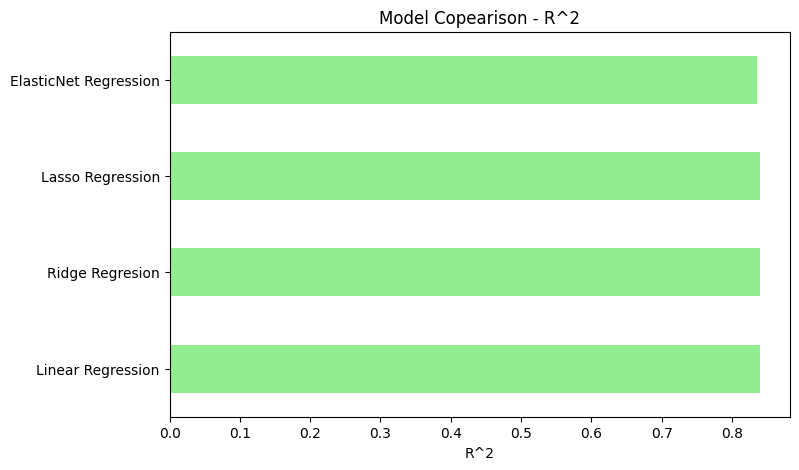

In [32]:
# Visualisasi perbandingan R^2
results_df['R^2'].plot(kind='barh', figsize=(8,5), color='lightgreen')
plt.title('Model Copearison - R^2')
plt.xlabel('R^2')
plt.show()

### residual plot - linearity assumption

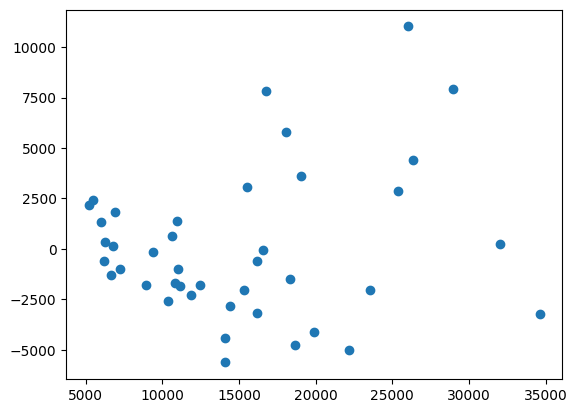

In [33]:
res = y_test- y_pred

plt.scatter(y_pred, res)
plt.show()

### using statsmodels

In [34]:
import statsmodels.api as sm 

In [35]:
X_train1 = sm.add_constant(X_train)
X_train1

,const,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
152,1.0,95.7,158.7,63.6,54.5,2015,92,3.05,3.030,9.0,62,4800,31,38
162,1.0,95.7,166.3,64.4,52.8,2140,98,3.19,3.030,9.0,70,4800,28,34
179,1.0,102.9,183.5,67.7,52.0,3016,171,3.27,3.350,9.3,161,5200,19,24
103,1.0,100.4,184.6,66.5,55.1,3060,181,3.43,3.270,9.0,152,5200,19,25
50,1.0,93.1,159.1,64.2,54.1,1890,91,3.03,3.150,9.0,68,5000,30,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,95.3,169.0,65.7,49.6,2385,70,3.33,3.255,9.4,101,6000,17,23
146,1.0,97.0,173.5,65.4,53.0,2290,108,3.62,2.640,9.0,82,4800,28,32
66,1.0,104.9,175.0,66.1,54.4,2700,134,3.43,3.640,22.0,72,4200,31,39
135,1.0,99.1,186.6,66.5,56.1,2758,121,3.54,3.070,9.3,110,5250,21,28


In [36]:
lr_1 = sm.OLS(y_train, X_train1).fit()


In [37]:
lr_1.params

const              -43252.025095
wheelbase             204.897721
carlength            -111.574816
carwidth              486.022891
carheight             -34.741893
curbweight              1.810523
enginesize            111.475474
boreratio            -188.742660
stroke              -2821.416054
compressionratio      320.186325
horsepower             29.672705
peakrpm                 2.315352
citympg              -267.899384
highwaympg            166.860848
dtype: float64

In [38]:
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     64.06
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.17e-54
Time:                        19:16:34   Log-Likelihood:                -1545.2
No. Observations:                 164   AIC:                             3118.
Df Residuals:                     150   BIC:                             3162.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.325e+04   1.78e+04  

In [39]:
X_test1 = sm.add_constant(X_test)
y_pred1 = lr_1.predict(X_test1)
r2_score(y_test, y_pred1)

0.8401014356167757

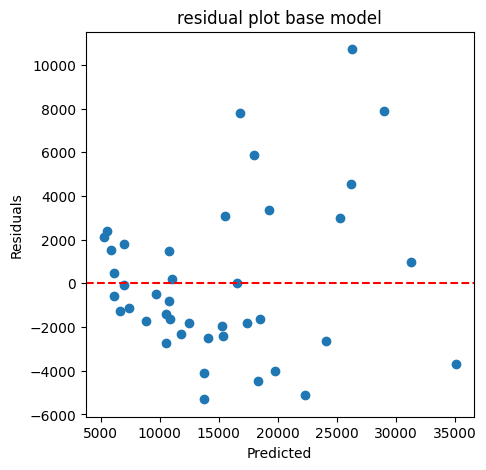

In [40]:
res1 = y_test - y_pred1

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(y_pred1, res1)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot base model")
plt.show()

# Transformation 1

In [41]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## copy dataset

In [42]:
df_t = df.copy()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### change appropriate data type

In [43]:
df_t['symboling'] = df_t['symboling'].astype(object)
df_t['curbweight'] = df_t['curbweight'].astype(float)
df_t['enginesize'] = df_t['enginesize'].astype(float)
df_t['horsepower'] = df_t['horsepower'].astype(float)
df_t['peakrpm'] = df_t['peakrpm'].astype(float)
df_t['citympg'] = df_t['citympg'].astype(float)
df_t['highwaympg'] = df_t['highwaympg'].astype(float)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    float64
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    float64
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### log transform

In [44]:
df_t[['price_log','horsepower_log','enginesize_log', 'wheelbase_log','compressionratio_log']] = df_t[['price','horsepower','enginesize', 'wheelbase','compressionratio']].apply(np.log)



In [45]:
df_t.drop(['price','horsepower','enginesize', 'wheelbase','compressionratio'], axis=1, inplace=True)
df_t

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,peakrpm,citympg,highwaympg,price_log,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log
0,3,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548.0,dohc,four,mpfi,3.47,2.68,5000.0,21.0,27.0,9.510075,4.709530,4.867534,4.484132,2.197225
1,3,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548.0,dohc,four,mpfi,3.47,2.68,5000.0,21.0,27.0,9.711116,4.709530,4.867534,4.484132,2.197225
2,1,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,2823.0,ohcv,six,mpfi,2.68,3.47,5000.0,19.0,26.0,9.711116,5.036953,5.023881,4.548600,2.197225
3,2,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,2337.0,ohc,four,mpfi,3.19,3.40,5500.0,24.0,30.0,9.543235,4.624973,4.691348,4.603168,2.302585
4,2,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,2824.0,ohc,five,mpfi,3.19,3.40,5500.0,18.0,22.0,9.767095,4.744932,4.912655,4.599152,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,2952.0,ohc,four,mpfi,3.78,3.15,5400.0,23.0,28.0,9.731809,4.736198,4.948760,4.692265,2.251292
201,-1,gas,turbo,four,sedan,rwd,front,188.8,68.8,55.5,3049.0,ohc,four,mpfi,3.78,3.15,5300.0,19.0,25.0,9.854560,5.075174,4.948760,4.692265,2.163323
202,-1,gas,std,four,sedan,rwd,front,188.8,68.9,55.5,3012.0,ohcv,six,mpfi,3.58,2.87,5500.0,18.0,23.0,9.975110,4.897840,5.153292,4.692265,2.174752
203,-1,diesel,turbo,four,sedan,rwd,front,188.8,68.9,55.5,3217.0,ohc,six,idi,3.01,3.40,4800.0,26.0,27.0,10.019936,4.663439,4.976734,4.692265,3.135494


In [46]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    object 
 1   fueltype              205 non-null    object 
 2   aspiration            205 non-null    object 
 3   doornumber            205 non-null    object 
 4   carbody               205 non-null    object 
 5   drivewheel            205 non-null    object 
 6   enginelocation        205 non-null    object 
 7   carlength             205 non-null    float64
 8   carwidth              205 non-null    float64
 9   carheight             205 non-null    float64
 10  curbweight            205 non-null    float64
 11  enginetype            205 non-null    object 
 12  cylindernumber        205 non-null    object 
 13  fuelsystem            205 non-null    object 
 14  boreratio             205 non-null    float64
 15  stroke                2

## num_fts numerical

In [47]:
num = df_t.select_dtypes(include=['float64']).columns.tolist()
num_fts = [col for col in num if col != 'price_log']
num_fts

['carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'boreratio',
 'stroke',
 'peakrpm',
 'citympg',
 'highwaympg',
 'horsepower_log',
 'enginesize_log',
 'wheelbase_log',
 'compressionratio_log']

## Splitting dataset

In [48]:
Xt = df_t[num_fts]
yt = df_t['price_log']

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2, random_state=33)

## Standard Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xt_train[num_fts] = scaler.fit_transform(Xt_train[num_fts])
Xt_train.sample(6)

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log
126,-0.362772,-0.375607,-0.836937,0.460607,1.589824,-1.149927,1.686894,-1.282907,-0.873434,2.312790,1.722149,-1.612319,-0.049498
20,-1.185241,-1.048825,-0.670916,-1.201608,-1.073377,-0.469805,0.620392,1.888903,1.710110,-0.948784,-1.018146,-0.678468,-0.012475
180,1.176303,0.345699,0.200693,1.196534,-0.173140,0.307477,0.193791,-0.829791,-1.016964,1.461879,1.271903,1.049481,-0.162948
13,0.280545,-0.471781,0.283703,0.478269,-0.023101,-0.210711,-1.832563,-0.678753,-0.442843,0.697596,1.122777,0.498248,-0.240656
92,-0.655929,-0.952651,0.366713,-1.144696,-0.623259,0.113156,0.193791,0.831633,0.848929,-0.992068,-0.750908,-0.678468,-0.086911
45,-1.421395,-1.048825,-0.670916,-1.201608,-1.073377,-0.469805,0.620392,1.888903,1.710110,-0.948784,-1.018146,-0.678468,-0.012475


In [50]:
Xt_test[num_fts] = scaler.fit_transform(Xt_test[num_fts])
Xt_test.sample(6)

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log
137,0.813066,0.037158,0.776359,0.288187,0.561658,-0.568600,0.624775,-0.852392,-0.542897,1.098174,-0.228278,-0.094766,-0.284471
91,-0.958959,-1.138107,0.136546,-1.446446,-0.843805,0.100953,0.022051,1.144640,1.206006,-1.131364,-1.011560,-0.863220,-0.126999
167,-0.052148,-0.354597,-0.863163,-0.285045,0.849958,0.740071,-0.781581,-0.020295,0.093068,0.245706,0.437152,-0.209374,-0.165730
29,-0.301729,-0.049898,-1.582953,0.220968,0.777883,1.957440,-0.379765,-0.852392,-0.860879,0.837225,0.671873,-0.625453,-1.194548
14,1.012731,0.211272,0.616406,0.676566,-0.267205,-0.203390,-1.886575,-0.685972,-0.701888,0.357573,0.849059,0.607603,-0.284471
15,1.012731,0.211272,0.616406,1.003327,0.849958,0.405295,0.423867,-1.351650,-1.178861,1.439690,1.708119,0.607603,-0.710995


## model building and eval

### sklearn

In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = pd.DataFrame()
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(Xt_train, yt_train)
    yt_pred = model.predict(Xt_test)

    mse = mean_squared_error(yt_test, yt_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(yt_test, yt_pred)
    r2 = r2_score(yt_test, yt_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}
    

# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" MAE: {metrics['MAE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

Linear Regression:
 RMSE: 0.24
 MAE: 0.18
 R^2: 0.811

Ridge Regresion:
 RMSE: 0.24
 MAE: 0.18
 R^2: 0.812

Lasso Regression:
 RMSE: 0.30
 MAE: 0.21
 R^2: 0.693

ElasticNet Regression:
 RMSE: 0.27
 MAE: 0.19
 R^2: 0.756



### statsmodels

In [52]:
Xt_train1 = sm.add_constant(Xt_train)
lr_t1 = sm.OLS(yt_train, Xt_train1).fit()
print(lr_t1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     79.63
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.04e-60
Time:                        19:16:34   Log-Likelihood:                 54.831
No. Observations:                 164   AIC:                            -81.66
Df Residuals:                     150   BIC:                            -38.26
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.3273 

In [53]:
Xt_test1 = sm.add_constant(Xt_test)
yt_pred1 = lr_t1.predict(Xt_test1)

In [54]:
r2_score(yt_test, yt_pred1)

0.811395891979481

### residual plot linearity

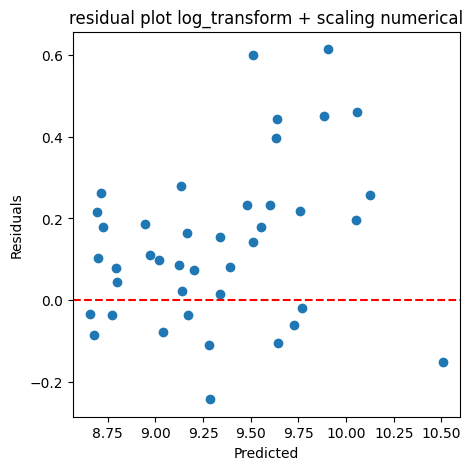

In [55]:
res1 = yt_test - yt_pred1

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(yt_pred1, res1)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot log_transform + scaling numerical")
plt.show()

### RESULTS

log transforming and standardizing numerical variable decrease RSquare test from 84 to 81. It also produces overfit model : Train Rsq adj hsa 86% while test Rsq adj s 81% (5% difference). Next step, get dummy variables and refit models.

# Transformation 2

## copy dataset

In [56]:
df_t2 = df_t.copy()

In [57]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    object 
 1   fueltype              205 non-null    object 
 2   aspiration            205 non-null    object 
 3   doornumber            205 non-null    object 
 4   carbody               205 non-null    object 
 5   drivewheel            205 non-null    object 
 6   enginelocation        205 non-null    object 
 7   carlength             205 non-null    float64
 8   carwidth              205 non-null    float64
 9   carheight             205 non-null    float64
 10  curbweight            205 non-null    float64
 11  enginetype            205 non-null    object 
 12  cylindernumber        205 non-null    object 
 13  fuelsystem            205 non-null    object 
 14  boreratio             205 non-null    float64
 15  stroke                2

In [58]:
catcol = df_t2.select_dtypes(include=['object', 'category']).columns.tolist()
catcol

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## dummy var

In [59]:
dummies = pd.get_dummies(df_t2[catcol], drop_first=True)
df_t2.drop(catcol,axis=1,inplace=True)
df_t2 = pd.concat([df_t2, dummies], axis=1)


In [60]:
df_t2

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,price_log,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,48.8,2548.0,3.47,2.68,5000.0,21.0,27.0,9.510075,4.709530,4.867534,4.484132,2.197225,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,168.8,64.1,48.8,2548.0,3.47,2.68,5000.0,21.0,27.0,9.711116,4.709530,4.867534,4.484132,2.197225,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,171.2,65.5,52.4,2823.0,2.68,3.47,5000.0,19.0,26.0,9.711116,5.036953,5.023881,4.548600,2.197225,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,176.6,66.2,54.3,2337.0,3.19,3.40,5500.0,24.0,30.0,9.543235,4.624973,4.691348,4.603168,2.302585,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,176.6,66.4,54.3,2824.0,3.19,3.40,5500.0,18.0,22.0,9.767095,4.744932,4.912655,4.599152,2.079442,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952.0,3.78,3.15,5400.0,23.0,28.0,9.731809,4.736198,4.948760,4.692265,2.251292,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
201,188.8,68.8,55.5,3049.0,3.78,3.15,5300.0,19.0,25.0,9.854560,5.075174,4.948760,4.692265,2.163323,True,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
202,188.8,68.9,55.5,3012.0,3.58,2.87,5500.0,18.0,23.0,9.975110,4.897840,5.153292,4.692265,2.174752,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
203,188.8,68.9,55.5,3217.0,3.01,3.40,4800.0,26.0,27.0,10.019936,4.663439,4.976734,4.692265,3.135494,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [61]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carlength              205 non-null    float64
 1   carwidth               205 non-null    float64
 2   carheight              205 non-null    float64
 3   curbweight             205 non-null    float64
 4   boreratio              205 non-null    float64
 5   stroke                 205 non-null    float64
 6   peakrpm                205 non-null    float64
 7   citympg                205 non-null    float64
 8   highwaympg             205 non-null    float64
 9   price_log              205 non-null    float64
 10  horsepower_log         205 non-null    float64
 11  enginesize_log         205 non-null    float64
 12  wheelbase_log          205 non-null    float64
 13  compressionratio_log   205 non-null    float64
 14  symboling_-1           205 non-null    bool   
 15  symbol

first value in each category is dropped to avoid dummy variables trap

In [62]:
df_t2.sample(5)

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,price_log,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
147,173.5,65.4,53.0,2455.0,3.62,2.64,5200.0,25.0,31.0,9.229947,4.543295,4.682131,4.574711,2.197225,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
61,177.8,66.5,53.7,2385.0,3.39,3.39,4800.0,26.0,32.0,9.268137,4.430817,4.804021,4.593098,2.151762,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
27,157.3,63.8,50.6,2191.0,3.03,3.39,5500.0,24.0,30.0,9.054622,4.624973,4.584967,4.540098,2.028148,False,False,True,False,False,True,True,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
186,171.7,65.5,55.7,2275.0,3.19,3.40,5250.0,27.0,34.0,9.047233,4.442651,4.691348,4.577799,2.197225,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
145,172.0,65.4,54.3,2510.0,3.62,2.64,4800.0,24.0,29.0,9.328923,4.709530,4.682131,4.574711,2.041220,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


## Splitting data

In [63]:
x_col = df_t2.select_dtypes(include=['bool', 'Float64']).columns.tolist()
x_cols = [col for col in x_col if col != 'price_log']

Xt2 = df_t2[x_cols]
yt2 = df_t2['price_log']

Xt2_train, Xt2_test, yt2_train, yt2_test = train_test_split(Xt2, yt2, test_size=0.2, random_state=33)

In [64]:
Xt2_train.head(3)

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
152,158.7,63.6,54.5,2015.0,3.05,3.03,4800.0,31.0,38.0,4.127134,4.521789,4.561218,2.197225,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
162,166.3,64.4,52.8,2140.0,3.19,3.03,4800.0,28.0,34.0,4.248495,4.584967,4.561218,2.197225,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
179,183.5,67.7,52.0,3016.0,3.27,3.35,5200.0,19.0,24.0,5.081404,5.141664,4.633758,2.230014,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


In [65]:
nume = Xt2_train.select_dtypes(include=['Float64']).columns.tolist()
nume

['carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'boreratio',
 'stroke',
 'peakrpm',
 'citympg',
 'highwaympg',
 'horsepower_log',
 'enginesize_log',
 'wheelbase_log',
 'compressionratio_log']

## Standard Scaling

In [66]:
Xt2_train[nume]= scaler.fit_transform(Xt2_train[nume])
Xt2_train

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
152,-1.193384,-1.048825,0.366713,-0.993586,-0.998357,-0.728899,-0.659410,0.831633,0.992459,-1.313863,-0.939728,-0.461701,-0.240656,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
162,-0.574497,-0.664129,-0.338875,-0.748277,-0.473219,-0.728899,-0.659410,0.378517,0.418338,-0.948784,-0.714315,-0.461701,-0.240656,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
179,0.826143,0.922743,-0.670916,0.970850,-0.173140,0.307477,0.193791,-0.980830,-1.016964,1.556783,1.271903,0.784425,-0.124725,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
103,0.915719,0.345699,0.615744,1.057199,0.427018,0.048383,0.193791,-0.980830,-0.873434,1.383739,1.474678,0.361909,-0.240656,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
50,-1.160811,-0.760303,0.200693,-1.238895,-1.073377,-0.340258,-0.232810,0.680595,-0.012253,-1.035984,-0.978722,-0.934870,-0.240656,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.354629,-0.038997,-1.667040,-0.267471,0.051919,-0.000197,1.900195,-1.282907,-1.160495,0.154103,-1.914803,-0.533653,-0.086911,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
146,0.011818,-0.183258,-0.255864,-0.453906,1.139706,-1.991983,-0.659410,0.378517,0.131278,-0.472812,-0.367647,-0.229915,-0.240656,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
66,0.133966,0.153351,0.325208,0.350708,0.427018,1.246693,-1.939213,0.831633,1.135989,-0.864040,0.401972,1.115111,2.919505,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
135,1.078584,0.345699,1.030796,0.464532,0.839627,-0.599352,0.300441,-0.678753,-0.442843,0.410883,0.037874,0.138025,-0.124725,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [67]:
Xt2_test[nume] = scaler.fit_transform(Xt2_test[nume])
Xt2_test.sample(6)

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
54,-0.834169,-0.963993,-0.023408,-1.386696,-1.096068,-0.325127,-0.379765,1.144640,1.364997,-1.170063,-1.237785,-1.104537,-0.284471,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
91,-0.958959,-1.138107,0.136546,-1.446446,-0.843805,0.100953,0.022051,1.144640,1.206006,-1.131364,-1.011560,-0.863220,-0.126999,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
128,-0.659462,-0.615767,-1.023116,0.200429,1.282409,-1.085982,1.428407,-1.185230,-0.701888,1.780886,1.444252,-1.742128,-0.088679,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
202,0.996092,1.081839,0.536429,0.596276,0.705808,-1.177285,0.624775,-1.018811,-1.019870,0.628089,1.038344,1.459544,-0.365851,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
155,-0.592907,-1.225164,1.976009,0.779262,-1.204181,-0.690337,-0.781581,0.478963,0.411050,-1.414930,-1.199063,-0.659206,-0.284471,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
104,-0.509713,0.646555,-1.782895,0.706441,0.165245,0.040084,0.022051,-0.852392,-0.701888,1.098174,1.198506,-1.420190,-0.284471,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False


## model building and eval

### sklearn

In [68]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = pd.DataFrame()
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(Xt2_train, yt2_train)
    yt2_pred = model.predict(Xt2_test)

    mse = mean_squared_error(yt2_test, yt2_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(yt2_test, yt2_pred)
    r2 = r2_score(yt2_test, yt2_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}
    

# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" MAE: {metrics['MAE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

Linear Regression:
 RMSE: 0.22
 MAE: 0.18
 R^2: 0.844

Ridge Regresion:
 RMSE: 0.20
 MAE: 0.16
 R^2: 0.861

Lasso Regression:
 RMSE: 0.30
 MAE: 0.21
 R^2: 0.693

ElasticNet Regression:
 RMSE: 0.27
 MAE: 0.19
 R^2: 0.756



### statsmodel

#### changing boolean column data type to integer | OLS statsmodel with boolean data type returns error

In [69]:
boole = Xt2_train.select_dtypes(include='bool').columns.to_list()
Xt2_train[boole] = Xt2_train[boole].astype(int)
Xt2_train

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
152,-1.193384,-1.048825,0.366713,-0.993586,-0.998357,-0.728899,-0.659410,0.831633,0.992459,-1.313863,-0.939728,-0.461701,-0.240656,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
162,-0.574497,-0.664129,-0.338875,-0.748277,-0.473219,-0.728899,-0.659410,0.378517,0.418338,-0.948784,-0.714315,-0.461701,-0.240656,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
179,0.826143,0.922743,-0.670916,0.970850,-0.173140,0.307477,0.193791,-0.980830,-1.016964,1.556783,1.271903,0.784425,-0.124725,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
103,0.915719,0.345699,0.615744,1.057199,0.427018,0.048383,0.193791,-0.980830,-0.873434,1.383739,1.474678,0.361909,-0.240656,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
50,-1.160811,-0.760303,0.200693,-1.238895,-1.073377,-0.340258,-0.232810,0.680595,-0.012253,-1.035984,-0.978722,-0.934870,-0.240656,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.354629,-0.038997,-1.667040,-0.267471,0.051919,-0.000197,1.900195,-1.282907,-1.160495,0.154103,-1.914803,-0.533653,-0.086911,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
146,0.011818,-0.183258,-0.255864,-0.453906,1.139706,-1.991983,-0.659410,0.378517,0.131278,-0.472812,-0.367647,-0.229915,-0.240656,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
66,0.133966,0.153351,0.325208,0.350708,0.427018,1.246693,-1.939213,0.831633,1.135989,-0.864040,0.401972,1.115111,2.919505,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
135,1.078584,0.345699,1.030796,0.464532,0.839627,-0.599352,0.300441,-0.678753,-0.442843,0.410883,0.037874,0.138025,-0.124725,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [70]:
Xt_train2 = sm.add_constant(Xt2_train)
lr_t2 = sm.OLS(yt2_train, Xt_train2).fit()
print(lr_t2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     44.70
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.87e-56
Time:                        19:16:35   Log-Likelihood:                 117.75
No. Observations:                 164   AIC:                            -147.5
Df Residuals:                     120   BIC:                            -11.11
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.53

In [71]:
boole = Xt2_test.select_dtypes(include='bool').columns.to_list()
Xt2_test[boole] = Xt2_test[boole].astype(int)

Xt_test2 = sm.add_constant(Xt2_test)
yt_pred2 = lr_t2.predict(Xt_test2)

In [72]:
r2_score(yt2_test, yt_pred2)

0.8441909050374699

### residual plot linearity

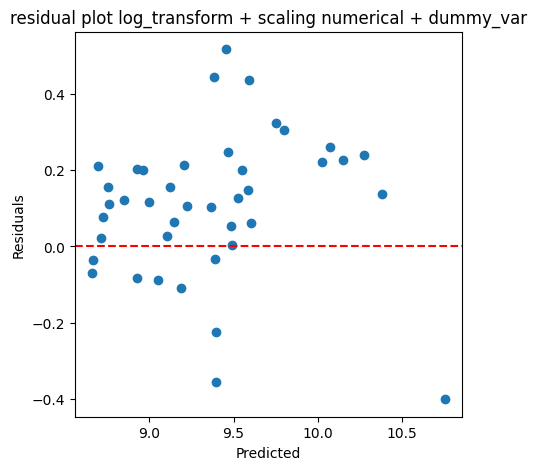

In [73]:
res2 = yt2_test - yt_pred2

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(yt_pred2, res2)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot log_transform + scaling numerical + dummy_var")
plt.show()

# Transformation 3

## RFE

In [74]:
from sklearn.feature_selection import RFE

using same variables from transformation 2 \
\
\
Xt2_train, Xt2_test, yt2_train, yt2_test

In [75]:
# instantiate LR
lm = LinearRegression()
lm.fit(Xt2_train, yt2_train)

# fit RFE
rfe = RFE(estimator=lm, n_features_to_select=20)       
rfe = rfe.fit(Xt2_train, yt2_train)

In [76]:
list(zip(Xt2_train.columns,rfe.support_,rfe.ranking_))

[('carlength', np.False_, np.int64(16)),
 ('carwidth', np.False_, np.int64(6)),
 ('carheight', np.False_, np.int64(20)),
 ('curbweight', np.True_, np.int64(1)),
 ('boreratio', np.False_, np.int64(24)),
 ('stroke', np.False_, np.int64(10)),
 ('peakrpm', np.False_, np.int64(23)),
 ('citympg', np.True_, np.int64(1)),
 ('highwaympg', np.True_, np.int64(1)),
 ('horsepower_log', np.True_, np.int64(1)),
 ('enginesize_log', np.False_, np.int64(22)),
 ('wheelbase_log', np.False_, np.int64(14)),
 ('compressionratio_log', np.False_, np.int64(19)),
 ('symboling_-1', np.False_, np.int64(9)),
 ('symboling_0', np.True_, np.int64(1)),
 ('symboling_1', np.False_, np.int64(7)),
 ('symboling_2', np.False_, np.int64(8)),
 ('symboling_3', np.True_, np.int64(1)),
 ('fueltype_gas', np.True_, np.int64(1)),
 ('aspiration_turbo', np.False_, np.int64(15)),
 ('doornumber_two', np.False_, np.int64(21)),
 ('carbody_hardtop', np.False_, np.int64(5)),
 ('carbody_hatchback', np.False_, np.int64(3)),
 ('carbody_sedan',

In [77]:
col_sup = Xt2_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'citympg', 'highwaympg', 'horsepower_log', 'symboling_0',
       'symboling_3', 'fueltype_gas', 'drivewheel_fwd', 'enginelocation_rear',
       'enginetype_ohc', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_idi', 'fuelsystem_mpfi'],
      dtype='object')

## using RFECV

default CrossValidation is 5 folds

In [78]:
from sklearn.feature_selection import RFECV

In [79]:
rfecv = RFECV(estimator=lm)       
rfecv = rfecv.fit(Xt2_train, yt2_train)

In [80]:
list(zip(Xt2_train.columns,rfecv.support_,rfecv.ranking_))

[('carlength', np.False_, np.int64(11)),
 ('carwidth', np.True_, np.int64(1)),
 ('carheight', np.False_, np.int64(15)),
 ('curbweight', np.True_, np.int64(1)),
 ('boreratio', np.False_, np.int64(19)),
 ('stroke', np.False_, np.int64(5)),
 ('peakrpm', np.False_, np.int64(18)),
 ('citympg', np.True_, np.int64(1)),
 ('highwaympg', np.True_, np.int64(1)),
 ('horsepower_log', np.True_, np.int64(1)),
 ('enginesize_log', np.False_, np.int64(17)),
 ('wheelbase_log', np.False_, np.int64(9)),
 ('compressionratio_log', np.False_, np.int64(14)),
 ('symboling_-1', np.False_, np.int64(4)),
 ('symboling_0', np.True_, np.int64(1)),
 ('symboling_1', np.False_, np.int64(2)),
 ('symboling_2', np.False_, np.int64(3)),
 ('symboling_3', np.True_, np.int64(1)),
 ('fueltype_gas', np.True_, np.int64(1)),
 ('aspiration_turbo', np.False_, np.int64(10)),
 ('doornumber_two', np.False_, np.int64(16)),
 ('carbody_hardtop', np.True_, np.int64(1)),
 ('carbody_hatchback', np.True_, np.int64(1)),
 ('carbody_sedan', np.T

In [81]:
col_supcv = Xt2_train.columns[rfecv.support_]
print(col_supcv)
print(f"Optimal number of features: {rfecv.n_features_}")

Index(['carwidth', 'curbweight', 'citympg', 'highwaympg', 'horsepower_log',
       'symboling_0', 'symboling_3', 'fueltype_gas', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_idi', 'fuelsystem_mpfi'],
      dtype='object')
Optimal number of features: 25


### visualizing RFECV

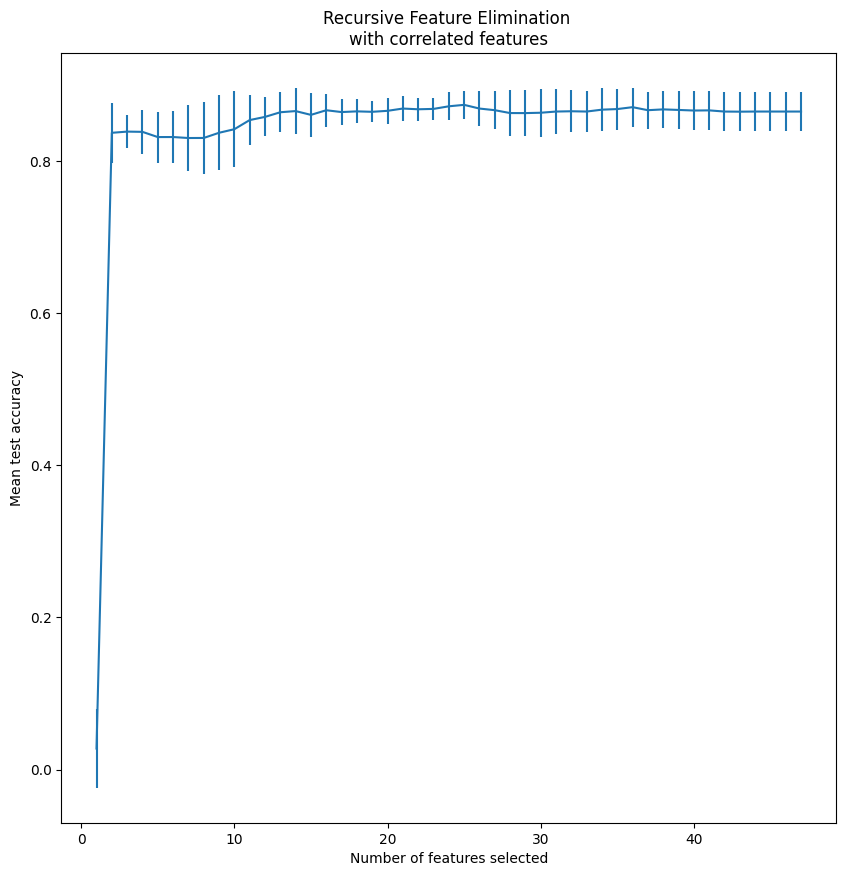

In [82]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure(figsize=(10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

## Model Building RFECV

In [83]:
X_train_rfecv = Xt2_train[col_supcv]
X_train_rfecvc = sm.add_constant(X_train_rfecv)
lm_rfecv = sm.OLS(yt2_train,X_train_rfecvc).fit()



#Summary of linear model
print(lm_rfecv.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     86.07
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           5.48e-71
Time:                        19:16:36   Log-Likelihood:                 108.16
No. Observations:                 164   AIC:                            -168.3
Df Residuals:                     140   BIC:                            -93.92
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.71

In [84]:
X_test_rfecv = Xt2_test[col_supcv]
X_test_rfecvc = sm.add_constant(X_test_rfecv)
yrfecv_pred = lm_rfecv.predict(X_test_rfecvc)

In [85]:
r2_score(yt2_test, yrfecv_pred)

0.8599194280878858

### residual plots - linearity

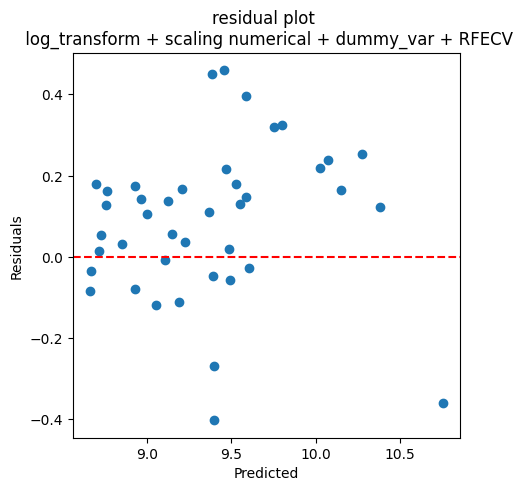

In [86]:
res3 = yt2_test - yrfecv_pred

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(yt_pred2, res3)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot \n log_transform + scaling numerical + dummy_var + RFECV")
plt.show()

### VIF check all col

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
Xtrf = Xt2_train[col_supcv]
Xtrf

,carwidth,curbweight,citympg,highwaympg,horsepower_log,symboling_0,symboling_3,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,enginelocation_rear,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_idi,fuelsystem_mpfi
152,-1.048825,-0.993586,0.831633,0.992459,-1.313863,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
162,-0.664129,-0.748277,0.378517,0.418338,-0.948784,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
179,0.922743,0.970850,-0.980830,-1.016964,1.556783,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
103,0.345699,1.057199,-0.980830,-0.873434,1.383739,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
50,-0.760303,-1.238895,0.680595,-0.012253,-1.035984,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.038997,-0.267471,-1.282907,-1.160495,0.154103,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
146,-0.183258,-0.453906,0.378517,0.131278,-0.472812,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
66,0.153351,0.350708,0.831633,1.135989,-0.864040,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
135,0.345699,0.464532,-0.678753,-0.442843,0.410883,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [89]:
vif = pd.DataFrame()
vif['Features'] = Xtrf.columns
vif['VIF'] = [variance_inflation_factor(Xtrf.values, i) for i in range(Xtrf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,enginetype_rotor,inf
22,cylindernumber_two,inf
7,fueltype_gas,164.57
3,highwaympg,33.02
2,citympg,32.26
23,fuelsystem_idi,25.05
18,cylindernumber_four,24.16
1,curbweight,20.43
10,carbody_sedan,13.93
9,carbody_hatchback,12.07


#### LR1 dropping carbody_hardtop p val 0.299

In [90]:
Xtrf1 = Xtrf.drop("carbody_hardtop", axis=1)
Xtrf1c = sm.add_constant(Xtrf1)
lm_1= sm.OLS(yt2_train,Xtrf1c).fit()



#Summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     89.88
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           9.75e-72
Time:                        19:16:36   Log-Likelihood:                 107.53
No. Observations:                 164   AIC:                            -169.1
Df Residuals:                     141   BIC:                            -97.75
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.67

##### vif check

In [91]:
vif = pd.DataFrame()
vif['Features'] = Xtrf1.columns
vif['VIF'] = [variance_inflation_factor(Xtrf1.values, i) for i in range(Xtrf1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,cylindernumber_two,inf
15,enginetype_rotor,inf
7,fueltype_gas,139.31
3,highwaympg,33.02
2,citympg,32.25
17,cylindernumber_four,24.16
22,fuelsystem_idi,21.81
1,curbweight,20.05
4,horsepower_log,10.78
18,cylindernumber_six,10.34


##### LR2 dropping carbody_sedan p val is 0.109

In [92]:
Xtrf2 = Xtrf1.drop("carbody_sedan", axis=1)
Xtrf2c = sm.add_constant(Xtrf2)
lm_2= sm.OLS(yt2_train,Xtrf2c).fit()



#Summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     92.98
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           3.57e-72
Time:                        19:16:36   Log-Likelihood:                 106.03
No. Observations:                 164   AIC:                            -168.1
Df Residuals:                     142   BIC:                            -99.86
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.63

##### vif check

In [93]:
vif = pd.DataFrame()
vif['Features'] = Xtrf2.columns
vif['VIF'] = [variance_inflation_factor(Xtrf2.values, i) for i in range(Xtrf2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,enginetype_rotor,inf
20,cylindernumber_two,inf
7,fueltype_gas,131.77
3,highwaympg,33.01
2,citympg,32.20
16,cylindernumber_four,23.69
21,fuelsystem_idi,20.87
1,curbweight,19.83
4,horsepower_log,10.74
17,cylindernumber_six,9.81


#### LR 3 dropping carwidth p val is 0.137

In [94]:
Xtrf3 = Xtrf2.drop("carwidth", axis=1)
Xtrf3c = sm.add_constant(Xtrf3)
lm_3= sm.OLS(yt2_train,Xtrf3c).fit()



#Summary of linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     96.68
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.07e-72
Time:                        19:16:36   Log-Likelihood:                 104.74
No. Observations:                 164   AIC:                            -167.5
Df Residuals:                     143   BIC:                            -102.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.66

##### vif check

In [95]:
vif = pd.DataFrame()
vif['Features'] = Xtrf3.columns
vif['VIF'] = [variance_inflation_factor(Xtrf3.values, i) for i in range(Xtrf3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,cylindernumber_two,inf
13,enginetype_rotor,inf
6,fueltype_gas,127.04
2,highwaympg,32.56
1,citympg,32.18
15,cylindernumber_four,22.17
20,fuelsystem_idi,20.22
0,curbweight,11.68
3,horsepower_log,10.71
16,cylindernumber_six,8.52


#### LR4 dropping citympg p val 0.107

In [96]:
Xtrf4 = Xtrf3.drop("citympg", axis=1)
Xtrf4c = sm.add_constant(Xtrf4)
lm_4= sm.OLS(yt2_train,Xtrf4c).fit()



#Summary of linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           3.85e-73
Time:                        19:16:36   Log-Likelihood:                 103.25
No. Observations:                 164   AIC:                            -166.5
Df Residuals:                     144   BIC:                            -104.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.60

##### vif check

In [97]:
vif = pd.DataFrame()
vif['Features'] = Xtrf4.columns
vif['VIF'] = [variance_inflation_factor(Xtrf4.values, i) for i in range(Xtrf4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,enginetype_rotor,inf
18,cylindernumber_two,inf
5,fueltype_gas,109.04
14,cylindernumber_four,19.87
19,fuelsystem_idi,16.54
0,curbweight,11.30
2,horsepower_log,10.69
1,highwaympg,8.39
15,cylindernumber_six,7.69
13,cylindernumber_five,6.09


#### LR5 dropping highwaympg p val 0.237

In [98]:
Xtrf5 = Xtrf4.drop("highwaympg", axis=1)
Xtrf5c = sm.add_constant(Xtrf5)
lm_5= sm.OLS(yt2_train,Xtrf5c).fit()

#Summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     105.7
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           7.38e-74
Time:                        19:16:37   Log-Likelihood:                 102.45
No. Observations:                 164   AIC:                            -166.9
Df Residuals:                     145   BIC:                            -108.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.60

# ALL X VARS p VAL SAFE NOW LETS CHECK VIF

In [99]:
vif = pd.DataFrame()
vif['Features'] = Xtrf5.columns
vif['VIF'] = [variance_inflation_factor(Xtrf5.values, i) for i in range(Xtrf5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,cylindernumber_two,inf
11,enginetype_rotor,inf
4,fueltype_gas,108.37
13,cylindernumber_four,19.85
18,fuelsystem_idi,16.32
0,curbweight,9.66
1,horsepower_log,9.06
14,cylindernumber_six,7.61
12,cylindernumber_five,6.05
10,enginetype_ohcv,3.53


## LR6 drop  cylindernumber_two vif infinity

In [100]:
Xtrf6 = Xtrf5.drop("cylindernumber_two", axis=1)
Xtrf6c = sm.add_constant(Xtrf6)
lm_6= sm.OLS(yt2_train,Xtrf6c).fit()

#Summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     105.7
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           7.38e-74
Time:                        19:16:37   Log-Likelihood:                 102.45
No. Observations:                 164   AIC:                            -166.9
Df Residuals:                     145   BIC:                            -108.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.60

### check vif

In [101]:
vif = pd.DataFrame()
vif['Features'] = Xtrf6.columns
vif['VIF'] = [variance_inflation_factor(Xtrf6.values, i) for i in range(Xtrf6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fueltype_gas,108.37
13,cylindernumber_four,19.85
17,fuelsystem_idi,16.32
0,curbweight,9.66
1,horsepower_log,9.06
14,cylindernumber_six,7.61
12,cylindernumber_five,6.05
11,enginetype_rotor,4.26
10,enginetype_ohcv,3.53
7,drivewheel_fwd,2.36


## LR7 drop fueltype_gas VIF 108.37

In [102]:
Xtrf7 = Xtrf6.drop("fueltype_gas", axis=1)
Xtrf7c = sm.add_constant(Xtrf7)
lm_7= sm.OLS(yt2_train,Xtrf7c).fit()

#Summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     105.7
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           7.38e-74
Time:                        19:16:37   Log-Likelihood:                 102.45
No. Observations:                 164   AIC:                            -166.9
Df Residuals:                     145   BIC:                            -108.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.81

### check vif

In [103]:
vif = pd.DataFrame()
vif['Features'] = Xtrf7.columns
vif['VIF'] = [variance_inflation_factor(Xtrf7.values, i) for i in range(Xtrf7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,13.85
1,horsepower_log,8.51
0,curbweight,8.22
8,enginetype_ohc,7.15
6,drivewheel_fwd,6.22
17,fuelsystem_mpfi,3.88
13,cylindernumber_six,2.64
16,fuelsystem_idi,2.62
4,carbody_hatchback,2.55
3,symboling_3,2.29


# LR7 might be usable, look at VIF n p val of all X var. how much would we tolerate VIF? Under 10?

## LR8 drop cylindernumber_four VIF 13.85

### Rsq adj dropped 2% here

In [104]:
Xtrf8 = Xtrf7.drop("cylindernumber_four", axis=1)
Xtrf8c = sm.add_constant(Xtrf8)
lm_8= sm.OLS(yt2_train,Xtrf8c).fit()

#Summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     90.61
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.41e-68
Time:                        19:16:37   Log-Likelihood:                 85.970
No. Observations:                 164   AIC:                            -135.9
Df Residuals:                     146   BIC:                            -80.14
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.19

### check vif

In [105]:
vif = pd.DataFrame()
vif['Features'] = Xtrf8.columns
vif['VIF'] = [variance_inflation_factor(Xtrf8.values, i) for i in range(Xtrf8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower_log,8.46
0,curbweight,8.22
6,drivewheel_fwd,5.66
8,enginetype_ohc,4.68
16,fuelsystem_mpfi,2.82
15,fuelsystem_idi,2.40
3,symboling_3,2.25
4,carbody_hatchback,2.17
9,enginetype_ohcv,2.04
12,cylindernumber_six,1.94


## LR 9 drop cylindernumber_six p val 0.905

In [106]:
Xtrf9 = Xtrf8.drop("cylindernumber_six", axis=1)
Xtrf9c = sm.add_constant(Xtrf9)
lm_9= sm.OLS(yt2_train,Xtrf9c).fit()

#Summary of linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.92
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.42e-69
Time:                        19:16:37   Log-Likelihood:                 85.962
No. Observations:                 164   AIC:                            -137.9
Df Residuals:                     147   BIC:                            -85.23
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.19

### check vif

In [107]:
vif = pd.DataFrame()
vif['Features'] = Xtrf9.columns
vif['VIF'] = [variance_inflation_factor(Xtrf9.values, i) for i in range(Xtrf9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.08
1,horsepower_log,7.87
6,drivewheel_fwd,5.66
8,enginetype_ohc,4.68
15,fuelsystem_mpfi,2.79
14,fuelsystem_idi,2.31
3,symboling_3,2.23
4,carbody_hatchback,2.13
9,enginetype_ohcv,1.86
2,symboling_0,1.72


## LR 10 drop cylindernumber_twelve p val 0.645

In [108]:
Xtrf10 = Xtrf9.drop("cylindernumber_twelve", axis=1)
Xtrf10c = sm.add_constant(Xtrf10)
lm_10= sm.OLS(yt2_train,Xtrf10c).fit()

#Summary of linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.52e-70
Time:                        19:16:37   Log-Likelihood:                 85.843
No. Observations:                 164   AIC:                            -139.7
Df Residuals:                     148   BIC:                            -90.09
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.1939 

### check vif

In [109]:
vif = pd.DataFrame()
vif['Features'] = Xtrf10.columns
vif['VIF'] = [variance_inflation_factor(Xtrf10.values, i) for i in range(Xtrf10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.08
1,horsepower_log,7.73
6,drivewheel_fwd,5.65
8,enginetype_ohc,4.67
14,fuelsystem_mpfi,2.76
13,fuelsystem_idi,2.31
3,symboling_3,2.22
4,carbody_hatchback,2.13
9,enginetype_ohcv,1.81
2,symboling_0,1.71


## LR 11 drop fuelsystem_idi p val 0.098

In [110]:
Xtrf11 = Xtrf10.drop("fuelsystem_idi", axis=1)
Xtrf11c = sm.add_constant(Xtrf11)
lm_11= sm.OLS(yt2_train,Xtrf11c).fit()

#Summary of linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           5.56e-71
Time:                        19:16:37   Log-Likelihood:                 84.319
No. Observations:                 164   AIC:                            -138.6
Df Residuals:                     149   BIC:                            -92.14
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.2123 

In [111]:
vif = pd.DataFrame()
vif['Features'] = Xtrf11.columns
vif['VIF'] = [variance_inflation_factor(Xtrf11.values, i) for i in range(Xtrf11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,drivewheel_fwd,5.64
1,horsepower_log,5.25
0,curbweight,4.91
8,enginetype_ohc,4.44
13,fuelsystem_mpfi,2.70
3,symboling_3,2.17
4,carbody_hatchback,2.12
9,enginetype_ohcv,1.81
2,symboling_0,1.69
10,enginetype_rotor,1.34


## LR 12 drop enginetype_ohcv p val 0.082

In [112]:
Xtrf12 = Xtrf11.drop("enginetype_ohcv", axis=1)
Xtrf12c = sm.add_constant(Xtrf12)
lm_12= sm.OLS(yt2_train,Xtrf12c).fit()

#Summary of linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     116.4
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.27e-71
Time:                        19:16:37   Log-Likelihood:                 82.649
No. Observations:                 164   AIC:                            -137.3
Df Residuals:                     150   BIC:                            -93.90
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.2338 

In [113]:
vif = pd.DataFrame()
vif['Features'] = Xtrf12.columns
vif['VIF'] = [variance_inflation_factor(Xtrf12.values, i) for i in range(Xtrf12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower_log,5.11
6,drivewheel_fwd,4.70
0,curbweight,4.45
8,enginetype_ohc,4.07
12,fuelsystem_mpfi,2.67
3,symboling_3,2.08
4,carbody_hatchback,2.08
2,symboling_0,1.69
9,enginetype_rotor,1.34
10,cylindernumber_five,1.28


## LR 13 drop symboling_0 p val 0.068

In [114]:
Xtrf13 = Xtrf12.drop("symboling_0", axis=1)
Xtrf13c = sm.add_constant(Xtrf13)
lm_13= sm.OLS(yt2_train,Xtrf13c).fit()

#Summary of linear model
print(lm_13.summary()) 

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.05e-71
Time:                        19:16:37   Log-Likelihood:                 80.817
No. Observations:                 164   AIC:                            -135.6
Df Residuals:                     151   BIC:                            -95.33
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.2701 

In [115]:
vif = pd.DataFrame()
vif['Features'] = Xtrf13.columns
vif['VIF'] = [variance_inflation_factor(Xtrf13.values, i) for i in range(Xtrf13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower_log,5.00
5,drivewheel_fwd,4.29
7,enginetype_ohc,4.06
0,curbweight,3.86
11,fuelsystem_mpfi,2.65
3,carbody_hatchback,2.07
2,symboling_3,2.03
8,enginetype_rotor,1.31
9,cylindernumber_five,1.26
6,enginelocation_rear,1.24


## Lr 14 droping cyclindernumber_three p val 0.077

In [116]:
Xtrf14 = Xtrf13.drop("cylindernumber_three", axis=1)
Xtrf14c = sm.add_constant(Xtrf14)
lm_14= sm.OLS(yt2_train,Xtrf14c).fit()

#Summary of linear model
print(lm_14.summary()) 

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     133.0
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           4.24e-72
Time:                        19:16:37   Log-Likelihood:                 79.110
No. Observations:                 164   AIC:                            -134.2
Df Residuals:                     152   BIC:                            -97.02
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2816    

In [127]:
print(lm_14.summary2()) 

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.899    
Dependent Variable:   price_log        AIC:                -134.2194
Date:                 2025-07-29 19:19 BIC:                -97.0210 
No. Observations:     164              Log-Likelihood:     79.110   
Df Model:             11               F-statistic:        133.0    
Df Residuals:         152              Prob (F-statistic): 4.24e-72 
R-squared:            0.906            Scale:              0.024074 
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                9.2816   0.0423 219.2032 0.0000  9.1980  9.3653
curbweight           0.3302   0.0274  12.0301 0.0000  0.2760  0.3844
horsepower_log       0.0618   0.0283   2.1793 0.0308  0.0058  0.1177
symboling_3          0.1035   0.0452   2.2920 0.0233 

In [134]:
ad = lm_14.params
ad

const                  9.281628
curbweight             0.330176
horsepower_log         0.061751
symboling_3            0.103527
carbody_hatchback     -0.101270
carbody_wagon         -0.165461
drivewheel_fwd        -0.093851
enginelocation_rear    0.631230
enginetype_ohc         0.109761
enginetype_rotor       0.203983
cylindernumber_five    0.129858
fuelsystem_mpfi        0.101115
dtype: float64

In [135]:
df_param = pd.DataFrame({'param':ad.index, 'coef':ad.values})
df_param['coef'] = df_param['coef'].round(2)
df_param = df_param.sort_values(by='coef', ascending=False)
df_param

,param,coef
0,const,9.28
7,enginelocation_rear,0.63
1,curbweight,0.33
9,enginetype_rotor,0.20
10,cylindernumber_five,0.13
8,enginetype_ohc,0.11
11,fuelsystem_mpfi,0.10
3,symboling_3,0.10
2,horsepower_log,0.06
6,drivewheel_fwd,-0.09


In [117]:
vif = pd.DataFrame()
vif['Features'] = Xtrf14.columns
vif['VIF'] = [variance_inflation_factor(Xtrf14.values, i) for i in range(Xtrf14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower_log,4.88
5,drivewheel_fwd,4.28
7,enginetype_ohc,3.90
0,curbweight,3.86
10,fuelsystem_mpfi,2.59
2,symboling_3,2.03
3,carbody_hatchback,2.02
8,enginetype_rotor,1.31
9,cylindernumber_five,1.25
6,enginelocation_rear,1.24


# LR 14 will be used to predict

## predict training

In [118]:
y_train_price = lm_14.predict(Xtrf14c)

Text(0.5, 0, 'Errors')

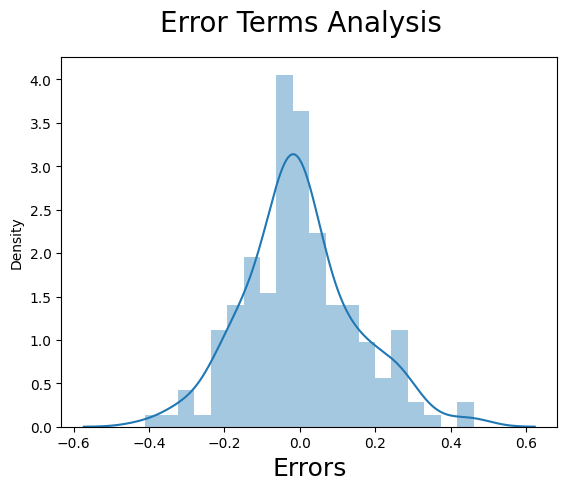

In [119]:
fig = plt.figure()
sns.distplot((yt2_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## predict test

In [120]:
Xt2_test.head(3)

,carlength,carwidth,carheight,curbweight,boreratio,stroke,peakrpm,citympg,highwaympg,horsepower_log,enginesize_log,wheelbase_log,compressionratio_log,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
87,-0.368284,-0.441653,-1.023116,-0.540852,-0.771730,0.618334,0.624775,-0.186714,0.093068,0.245706,-0.565960,-0.558156,-0.944706,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
47,1.894584,1.386537,-0.543256,2.564310,0.885996,2.779165,-0.882035,-1.518069,-1.655835,1.350827,2.454362,2.027408,-0.666009,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
188,-0.426520,-0.398125,0.616406,-0.733174,-0.699655,0.435729,0.624775,0.312544,0.411050,-0.147732,-0.598317,-0.391131,0.097068,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [121]:
yt2_test.head(3)

87      9.135509
47     10.381273
188     9.209840
Name: price_log, dtype: float64

In [122]:
Xttf = Xt2_test[Xtrf14.columns]
Xttfa = sm.add_constant(Xttf)
Xttfa.head(3)

,const,curbweight,horsepower_log,symboling_3,carbody_hatchback,carbody_wagon,drivewheel_fwd,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_five,fuelsystem_mpfi
87,1.0,-0.540852,0.245706,0,0,0,1,0,1,0,0,0
47,1.0,2.564310,1.350827,0,0,0,0,0,0,0,0,1
188,1.0,-0.733174,-0.147732,0,0,0,1,0,1,0,0,1


In [123]:
y_predlr14 = lm_14.predict(Xttfa)

Text(0, 0.5, 'y_pred')

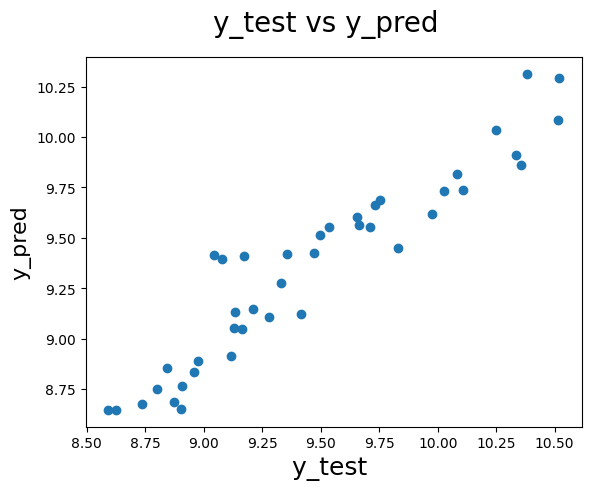

In [124]:
fig = plt.figure()
plt.scatter(yt2_test,y_predlr14)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

In [125]:
r2_score(yt2_test, y_predlr14)

0.8407086803141147

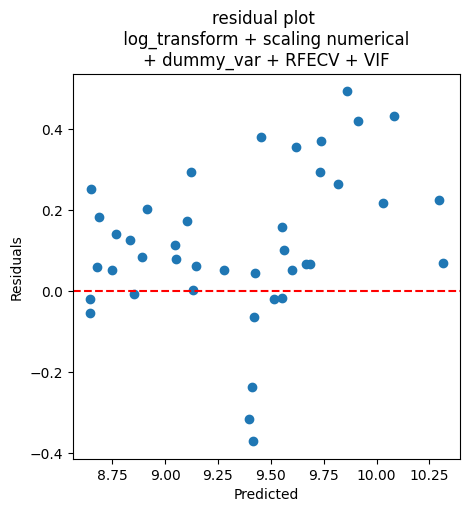

In [ ]:
res4 = yt2_test - y_predlr14

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.scatter(y_predlr14, res4)
plt.axhline(y=0, color='r', linestyle='--')
ax.set_title("residual plot \n log_transform + scaling numerical \n+ dummy_var + RFECV + VIF")
plt.show()

In [132]:
mse = mean_squared_error(yt2_test, y_predlr14)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yt2_test, y_predlr14)
r2 = r2_score(yt2_test, y_predlr14)

# Simpan hasil evaluasi di dictionary
results[name] = {'RMSE': rmse, 'R^2': r2, 'MAE': mae}

print(f" RMSE: {metrics['RMSE']:.2f}")
print(f" MAE: {metrics['MAE']:.2f}")
print(f" R^2: {metrics['R^2']:.3f}")

 RMSE: 0.22
 MAE: 0.17
 R^2: 0.841


In [133]:
mse = mean_squared_error(yt2_test, y_predlr14)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yt2_test, y_predlr14)
r2 = r2_score(yt2_test, y_predlr14)

df_sum = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value': [mse, rmse, mae, r2]
})
df_sum['Value'] = df_sum['Value'].round(2)
df_sum

,Metric,Value
0,MSE,0.05
1,RMSE,0.22
2,MAE,0.17
3,R²,0.84


In [128]:
import pickle

with open("/home/bri/carprice/.venv/model/lm_14_T4.pkl", "wb") as model_file:
    pickle.dump(lm_14, model_file)